In [1]:
import tensorflow as tf
import gc

import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras import initializers
from tensorflow import keras


In [2]:
# Hyper parameters
batch_size = 128
nb_epoch = 10
# Parameters for MNIST dataset
img_rows, img_cols = 28, 28
nb_classes = 10
# Parameters for LSTM network
nb_lstm_outputs = 30
nb_time_steps = img_rows
dim_input_vector = img_cols

num_classes=10
IMG_ROWS, IMG_COLS = 28, 28

input_shape = (IMG_ROWS, IMG_COLS, 1)

# Load numbers
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

number_x_train = x_train.reshape(60000, IMG_ROWS, IMG_COLS, 1)
number_x_test = x_test.reshape(10000, IMG_ROWS, IMG_COLS, 1)

number_x_train, number_x_test = number_x_train / 255.0, number_x_test / 255.0

number_x_train = number_x_train.astype('float32')
number_x_test = number_x_test.astype('float32')

number_y_train = tf.keras.utils.to_categorical(y_train, num_classes)
number_y_test = tf.keras.utils.to_categorical(y_test, num_classes)

#load fashion
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


fashon_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

number_class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

fashion_x_train = train_images.reshape(60000, IMG_ROWS, IMG_COLS, 1)
fashion_x_test = test_images.reshape(10000, IMG_ROWS, IMG_COLS, 1)

fashion_x_train, fashion_x_test = fashion_x_train / 255.0, fashion_x_test / 255.0

fashion_x_train = fashion_x_train.astype('float32')
fashion_x_test = fashion_x_test.astype('float32')

fashion_y_train = tf.keras.utils.to_categorical(train_labels, num_classes)
fashion_y_test = tf.keras.utils.to_categorical(test_labels, num_classes)



In [ ]:
#First create network to classify MINST number images


numberModel = Sequential()
numberModel.add(keras.layers.Convolution2D(20, (5, 5), activation='relu', input_shape=input_shape))
numberModel.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
numberModel.add(keras.layers.Convolution2D(50, (5, 5), activation='relu'))
numberModel.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
numberModel.add(keras.layers.Flatten()) 
numberModel.add(keras.layers.Dropout(0.25)) 
numberModel.add(tf.keras.layers.Dense(128, activation='relu')) 
numberModel.add(tf.keras.layers.Dropout(0.5))
numberModel.add(keras.layers.Dense(num_classes, activation='softmax'))

numberModel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
numberModel.summary()

# Training the model
history = numberModel.fit(number_x_train, 
                    number_y_train, 
                    epochs=nb_epoch, 
                    batch_size=batch_size, 
                    shuffle=True,
                    validation_data=(number_x_test, number_y_test),
                    verbose=1)

# Evaluation
evaluation = numberModel.evaluate(number_x_test, number_y_test, batch_size=batch_size, verbose=1)

numberModel.save('wk04/number_model')
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

del numberModel
    
gc.collect()


In [ ]:
#Then create network to classify MINST fashoin images

fashionModel = Sequential()
fashionModel.add(keras.layers.Convolution2D(20, (5, 5), activation='relu', input_shape=input_shape))
fashionModel.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
fashionModel.add(keras.layers.Convolution2D(50, (5, 5), activation='relu'))
fashionModel.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
fashionModel.add(keras.layers.Flatten()) 
fashionModel.add(keras.layers.Dropout(0.25)) 
fashionModel.add(tf.keras.layers.Dense(128, activation='relu')) 
fashionModel.add(tf.keras.layers.Dropout(0.5))
fashionModel.add(keras.layers.Dense(num_classes, activation='softmax'))

fashionModel.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fashionModel.fit(fashion_x_train, fashion_y_train, epochs=10)

test_loss, test_acc = fashionModel.evaluate(fashion_x_test, fashion_y_test, verbose=2)

fashionModel.save('wk04/fashion_model')

print('\nTest accuracy:', test_acc)

del fashionModel
    
gc.collect()

In [ ]:
# Now put together some data to create a model to tell what model to call

combined_x_train = []
combined_y_train = []

combined_x_test = []
combined_y_test = []

for i in range(6000):
    n = random.random()
    if n >= .5:
        combined_x_train.append(number_x_train[i])
        combined_y_train.append([1,0])
    else:
        combined_x_train.append(fashion_x_train[i])
        combined_y_train.append([0,1])

for i in range(1000):
    n = random.random()
    if n >= .5:
        combined_x_test.append(number_x_test[i])
        combined_y_test.append([1,0])
    else:
        combined_x_test.append(fashion_x_test[i])
        combined_y_test.append([0,1])
        
combined_x_train = np.array(combined_x_train)
combined_y_train = np.array(combined_y_train)
combined_x_test = np.array(combined_x_test)
combined_y_test = np.array(combined_y_test)

combinedModel = Sequential()
combinedModel.add(keras.layers.Convolution2D(20, (5, 5), activation='relu', input_shape=input_shape))
combinedModel.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
combinedModel.add(keras.layers.Convolution2D(50, (5, 5), activation='relu'))
combinedModel.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
combinedModel.add(keras.layers.Flatten()) 
combinedModel.add(keras.layers.Dropout(0.25)) 
combinedModel.add(tf.keras.layers.Dense(128, activation='relu')) 
combinedModel.add(tf.keras.layers.Dropout(0.5))
combinedModel.add(keras.layers.Dense(2, activation='softmax'))

combinedModel.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

combinedModel.fit(combined_x_train, combined_y_train, epochs=10)

test_loss, test_acc = combinedModel.evaluate(combined_x_test, combined_y_test, verbose=2)

combinedModel.save('wk04/combined_model')

print('\nTest accuracy:', test_acc)

del combinedModel
    
gc.collect()

['number', 'seven', 1.321765e-13]


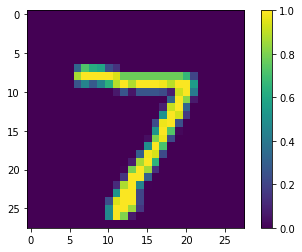

['fashion', 'Ankle boot', 0.99988484]


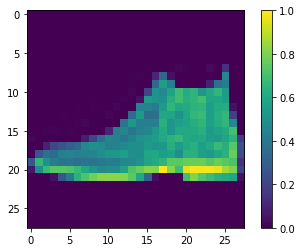

['number', 'two', 4.174733e-15]


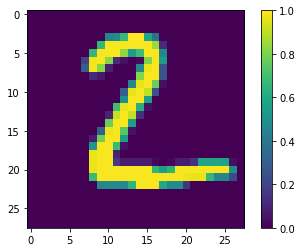

['fashion', 'Pullover', 0.9993563]


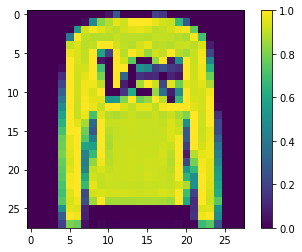

['number', 'one', 8.553556e-10]


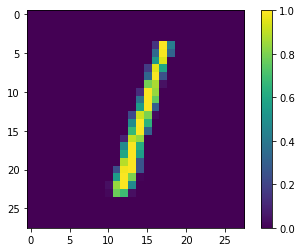

['fashion', 'Trouser', 1.0]


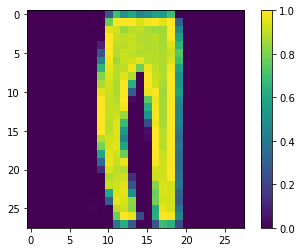

['number', 'zero', 1.0315e-17]


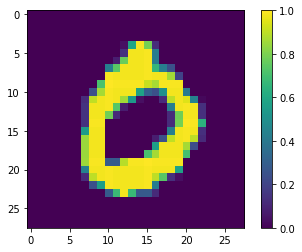

['fashion', 'Trouser', 1.0]


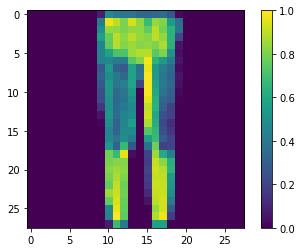

['number', 'four', 3.5211984e-13]


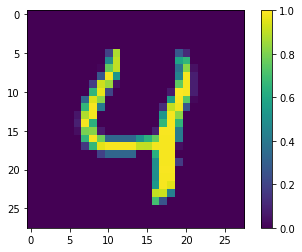

['fashion', 'Shirt', 0.87813497]


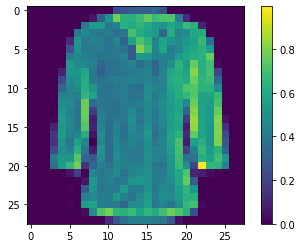

['number', 'one', 3.7545084e-12]


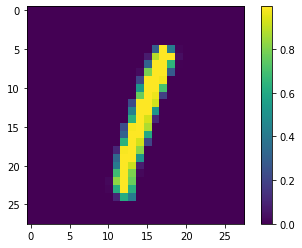

['fashion', 'Trouser', 1.0]


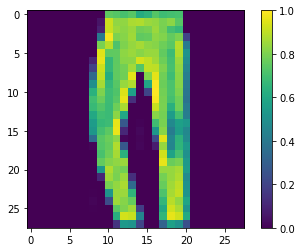

['number', 'four', 1.1927678e-16]


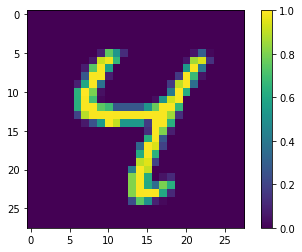

['fashion', 'Coat', 0.99901605]


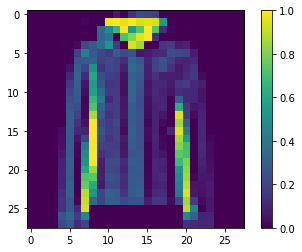

['number', 'nine', 1.269907e-13]


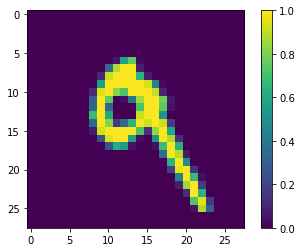

['fashion', 'Shirt', 0.9858272]


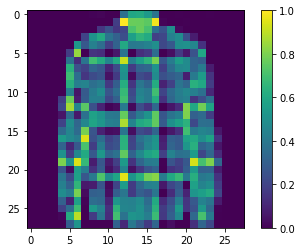

['number', 'five', 3.565905e-16]


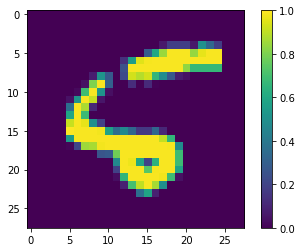

['fashion', 'Sandal', 0.9999999]


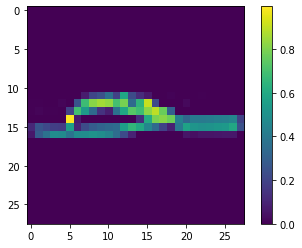

['number', 'nine', 7.1529285e-17]


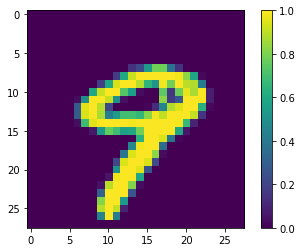

['fashion', 'Sneaker', 1.0]


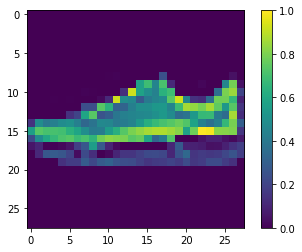

In [5]:
combinedModel = tf.keras.models.load_model('wk04/combined_model')
fashionModel = tf.keras.models.load_model('wk04/fashion_model')
numberModel =  tf.keras.models.load_model('wk04/number_model')


def  evaluateImage(image):
    prediction = combinedModel.predict(np.array([image]))
    
    returnValue = []
    
    if prediction[0][0] > prediction[0][1]:
        returnValue.append('number')
        subPred = numberModel.predict(np.array([image]))
        indexResult = np.where(subPred == np.amax(subPred))
        returnValue.append(number_class_names[indexResult[1][0]])
        returnValue.append(np.amax(subPred) * prediction[0][1])
    else:
        returnValue.append('fashion')
        subPred = fashionModel.predict(np.array([image]))
        indexResult = np.where(subPred == np.amax(subPred))
        returnValue.append(fashon_class_names[indexResult[1][0]])
        returnValue.append(np.amax(subPred) * prediction[0][1])
    
    return returnValue

def showImage(image):
    im = image.reshape(1, IMG_ROWS, IMG_COLS)
    plt.figure()
    plt.imshow(im[0])
    plt.colorbar()
    plt.grid(False)
    plt.show()


    
for i in range(10):
    pred = evaluateImage(number_x_test[i])
    print(pred)

    showImage(number_x_test[i])
    
    pred = evaluateImage(fashion_x_test[i])
    print(pred)

    showImage(fashion_x_test[i])